In [79]:
# set up Python environment: numpy for numerical routines, and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

# set display defaults
plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap


In [80]:
# The caffe module needs to be on the Python path;
#  we'll add it here explicitly.
import sys
caffe_root = '../'  # this file should be run from {caffe_root}/examples (otherwise change this line)
sys.path.insert(0, caffe_root + 'python')

import caffe
# If you get "No module named _caffe", either you have not built pycaffe or you have the wrong path.


In [81]:
caffe.set_mode_cpu()

model_def = caffe_root + 'myself/fine-ResNet-50/two_classification_problem/weighted-fine-resnet-128-6/deploy-50.prototxt'
model_weights = caffe_root + 'myself/fine-ResNet-50/two_classification_problem/weighted-fine-resnet-128-6/caffe_alexnet_train_12_iter_2000.caffemodel'

net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # use test mode (e.g., don't perform dropout)

In [82]:
# load the mean ImageNet image (as distributed with Caffe) for subtraction
mu = np.load(caffe_root + 'myself/fine-ResNet-50/two_classification_problem/weighted-fine-resnet-128-6/mnist_train_lmdb_mean.npy'


SyntaxError: invalid syntax (<ipython-input-82-c6abb2c55b54>, line 2)

In [83]:
mu = np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy')

In [84]:
# load the mean ImageNet image (as distributed with Caffe) for subtraction
mu = np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy')
mu = mu.mean(1).mean(1)  # average over pixels to obtain the mean (BGR) pixel values
print 'mean-subtracted values:', zip('BGR', mu)

# create transformer for the input called 'data'
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})

transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension
transformer.set_mean('data', mu)            # subtract the dataset-mean value in each channel
transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]
transformer.set_channel_swap('data', (2,1,0))  # swap channels from RGB to BGR

mean-subtracted values: [('B', 76.008954095363151), ('G', 73.589394884184003), ('R', 84.782681006123312)]


In [85]:
# set the size of the input (we can skip this if we're happy
#  with the default; we can also change it later, e.g., for different batch sizes)
net.blobs['data'].reshape(50,        # batch size
                          3,         # 3-channel (BGR) images
                          112, 112)  # image size is 227x227

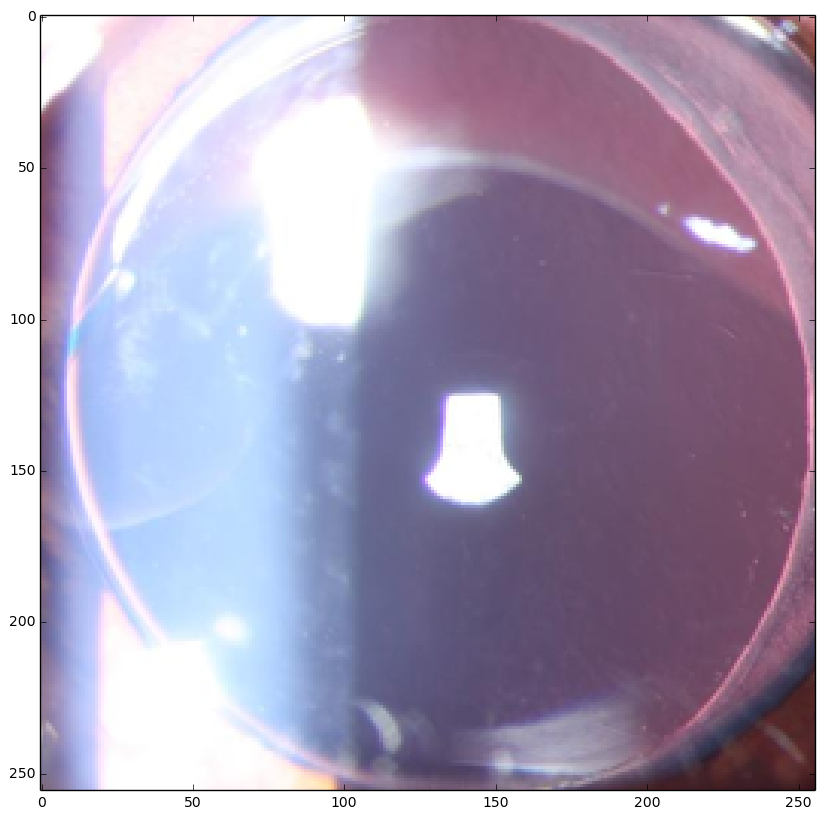

In [178]:
image = caffe.io.load_image(caffe_root + 'myself/hongfan-twoclass-1-10data/recurrence/4/1.png')
transformed_image = transformer.preprocess('data', image)
plt.imshow(image)

In [179]:


# copy the image data into the memory allocated for the net
net.blobs['data'].data[...] = transformed_image

### perform classification
output = net.forward()

output_prob = output['prob'][0]  # the output probability vector for the first image in the batch

print 'predicted class is:', output_prob.argmax()



predicted class is: 0


In [180]:


# sort top five predictions from softmax output
top_inds = output_prob.argsort()[::-1][:2]  # reverse sort and take five largest items

print 'probabilities and labels:'
zip(output_prob[top_inds], labels[top_inds])



probabilities and labels:


NameError: name 'labels' is not defined

In [ ]:
# sort top five predictions from softmax output
top_inds = output_prob.argsort()[::-1][:5]  # reverse sort and take five largest items

print 'probabilities and labels:'
zip(output_prob[top_inds], labels[top_inds])


In [ ]:
# sort top five predictions from softmax output
top_inds = output_prob.argsort()[::-1][:5]  # reverse sort and take five largest items

print 'probabilities and labels:'

In [ ]:
# sort top five predictions from softmax output
top_inds = output_prob.argsort()[::-1][:5]  # reverse sort and take five largest items

print 'probabilities and labels:'
zip(output_prob[top_inds])

In [ ]:
caffe.set_device(0)  # if we have multiple GPUs, pick the first one
caffe.set_mode_gpu()
net.forward()  # run once before timing to set up memory
%timeit net.forward()

In [ ]:
caffe.set_device(0)  # if we have multiple GPUs, pick the first one
caffe.set_mode_cpu()
net.forward()  # run once before timing to set up memory
%timeit net.forward()

In [ ]:
# for each layer, show the output shape
for layer_name, blob in net.blobs.iteritems():
    print layer_name + '\t' + str(blob.data.shape)

In [181]:
for layer_name, param in net.params.iteritems():
    print layer_name + '\t' + str(param[0].data.shape), str(param[1].data.shape)


conv1	(64, 3, 7, 7) (64,)
bn_conv1	(64,) (64,)
scale_conv1	(64,) (64,)
res2a_branch1	(256, 64, 1, 1)

IndexError: Index out of range

In [182]:
for layer_name, param in net.params.iteritems():
    print layer_name + '\t' + str(param[0].data.shape))


SyntaxError: invalid syntax (<ipython-input-182-214a5a48cc44>, line 2)

In [183]:
for layer_name, param in net.params.iteritems():
    print layer_name + '\t' + str(param[0].data.shape)


 conv1	(64, 3, 7, 7)
bn_conv1	(64,)
scale_conv1	(64,)
res2a_branch1	(256, 64, 1, 1)
bn2a_branch1	(256,)
scale2a_branch1	(256,)
res2a_branch2a	(64, 64, 1, 1)
bn2a_branch2a	(64,)
scale2a_branch2a	(64,)
res2a_branch2b	(64, 64, 3, 3)
bn2a_branch2b	(64,)
scale2a_branch2b	(64,)
res2a_branch2c	(256, 64, 1, 1)
bn2a_branch2c	(256,)
scale2a_branch2c	(256,)
res2b_branch2a	(64, 256, 1, 1)
bn2b_branch2a	(64,)
scale2b_branch2a	(64,)
res2b_branch2b	(64, 64, 3, 3)
bn2b_branch2b	(64,)
scale2b_branch2b	(64,)
res2b_branch2c	(256, 64, 1, 1)
bn2b_branch2c	(256,)
scale2b_branch2c	(256,)
res2c_branch2a	(64, 256, 1, 1)
bn2c_branch2a	(64,)
scale2c_branch2a	(64,)
res2c_branch2b	(64, 64, 3, 3)
bn2c_branch2b	(64,)
scale2c_branch2b	(64,)
res2c_branch2c	(256, 64, 1, 1)
bn2c_branch2c	(256,)
scale2c_branch2c	(256,)
res3a_branch1	(512, 256, 1, 1)
bn3a_branch1	(512,)
scale3a_branch1	(512,)
res3a_branch2a	(128, 256, 1, 1)
bn3a_branch2a	(128,)
scale3a_branch2a	(128,)
res3a_branch2b	(128, 128, 3, 3)
bn3a_branch2b	(128,)
s

In [184]:
def vis_square(data):
    """Take an array of shape (n, height, width) or (n, height, width, 3)
       and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)"""
    
    # normalize data for display
    data = (data - data.min()) / (data.max() - data.min())
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, n ** 2 - data.shape[0]),
               (0, 1), (0, 1))                 # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data, padding, mode='constant', constant_values=1)  # pad with ones (white)
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data); plt.axis('off')


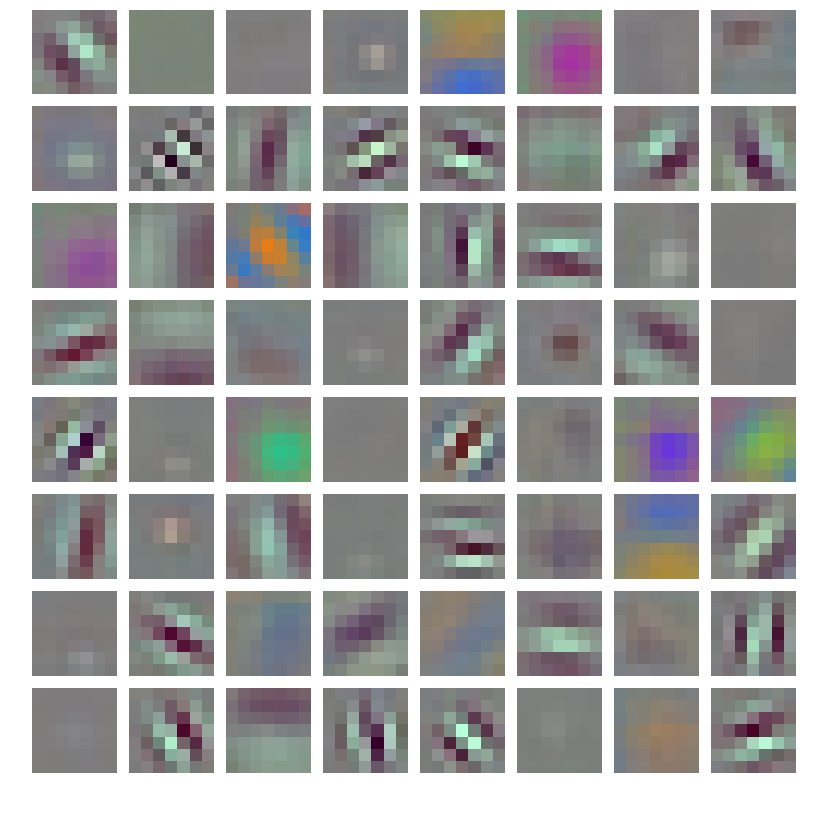

In [198]:
# the parameters are a list of [weights, biases]
filters = net.params['conv1'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

In [186]:
# the parameters are a list of [weights, biases]
filters = net.params['pool1'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

KeyError: 'pool1'

In [187]:
# the parameters are a list of [weights, biases]
filters = net.params['res2a'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

KeyError: 'res2a'

TypeError: Invalid dimensions for image data

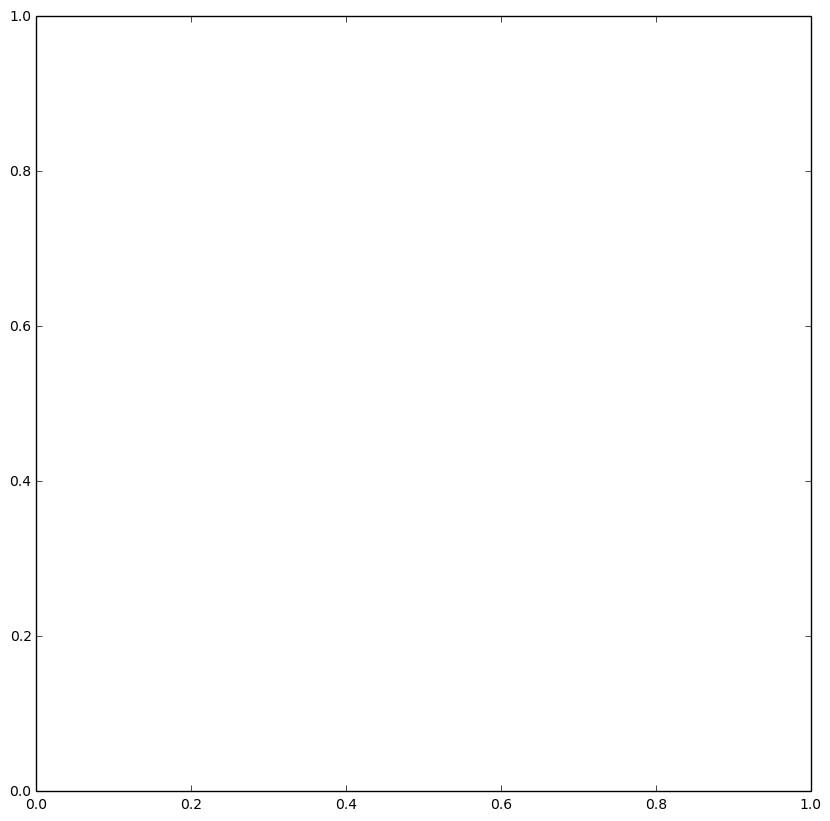

In [188]:
# the parameters are a list of [weights, biases]
filters = net.params['res2a_branch2a'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

In [ ]:
# the parameters are a list of [weights, biases]
filters = net.params['res2a_branch1'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

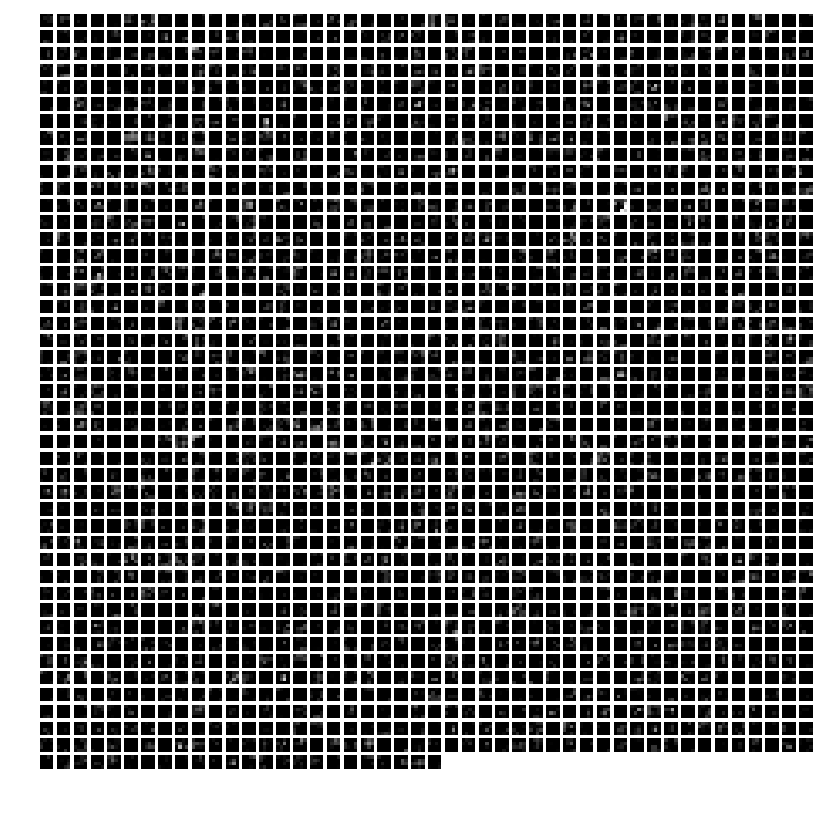

In [207]:

feat = net.blobs['res5a'].data[0, :10000]
vis_square(feat)

In [190]:

feat = net.blobs['bn5c_branch2c'].data[0, :100]
vis_square(feat)

KeyError: 'bn5c_branch2c'

In [191]:
feat = net.blobs['bn5c_branch2c'].data[0, :20000]
vis_square(feat)

KeyError: 'bn5c_branch2c'

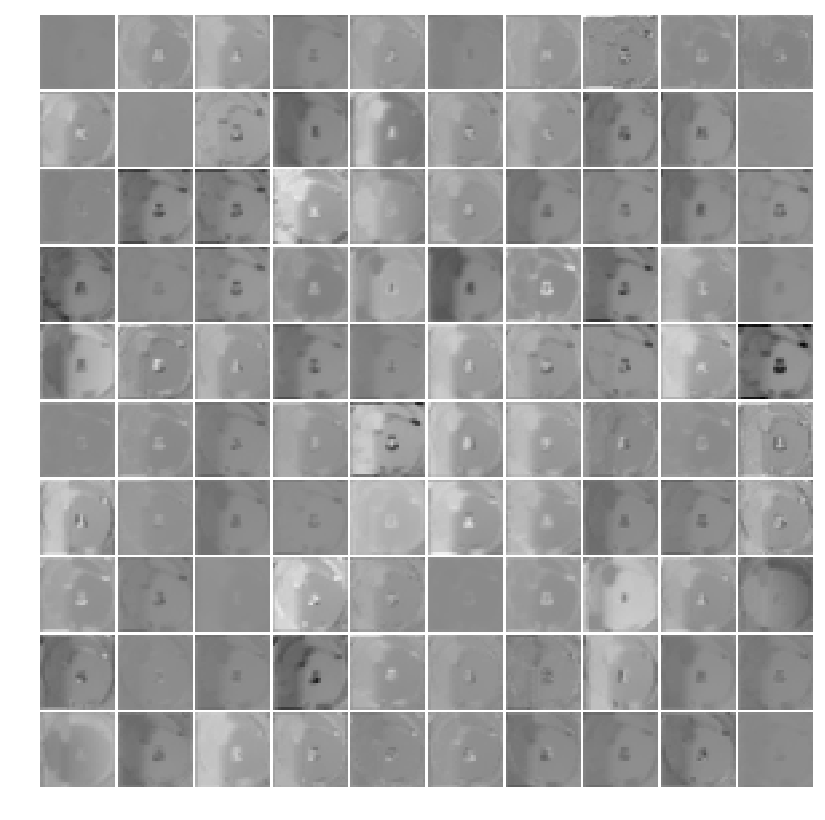

In [192]:
feat = net.blobs['res2a_branch1'].data[0, :100]
vis_square(feat)

TypeError: Invalid dimensions for image data

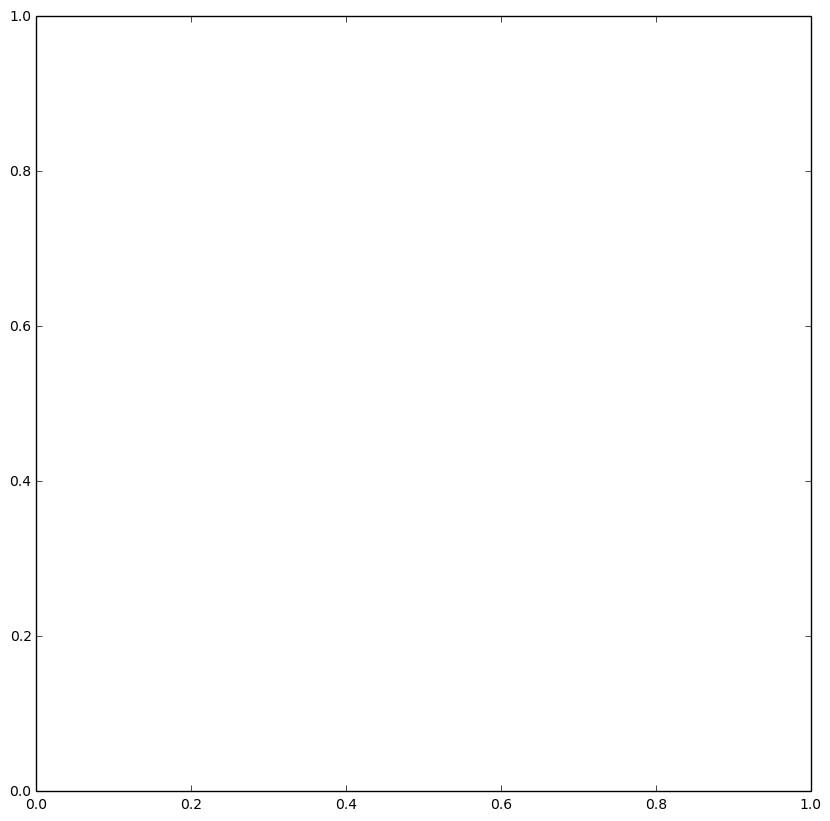

In [193]:
feat = net.blobs['res2a_branch1'].data[0:1, :1000]
vis_square(feat)

In [ ]:
feat = net.blobs['res3b_branch2c'].data[0, :100]
vis_square(feat)

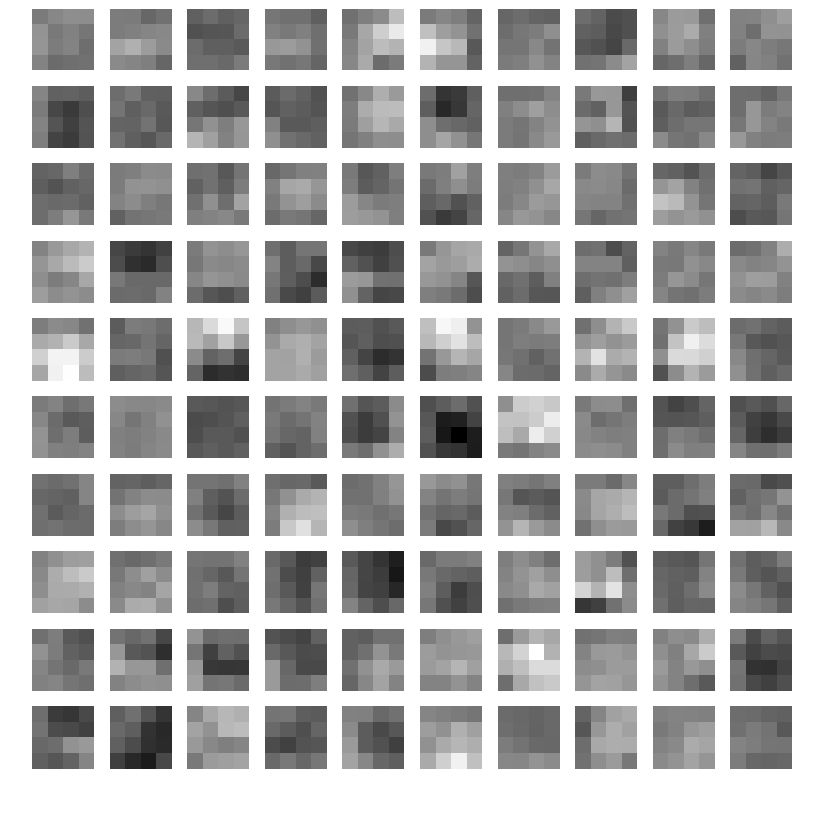

In [209]:
feat = net.blobs['res5c_branch2c'].data[0, :100]
vis_square(feat)

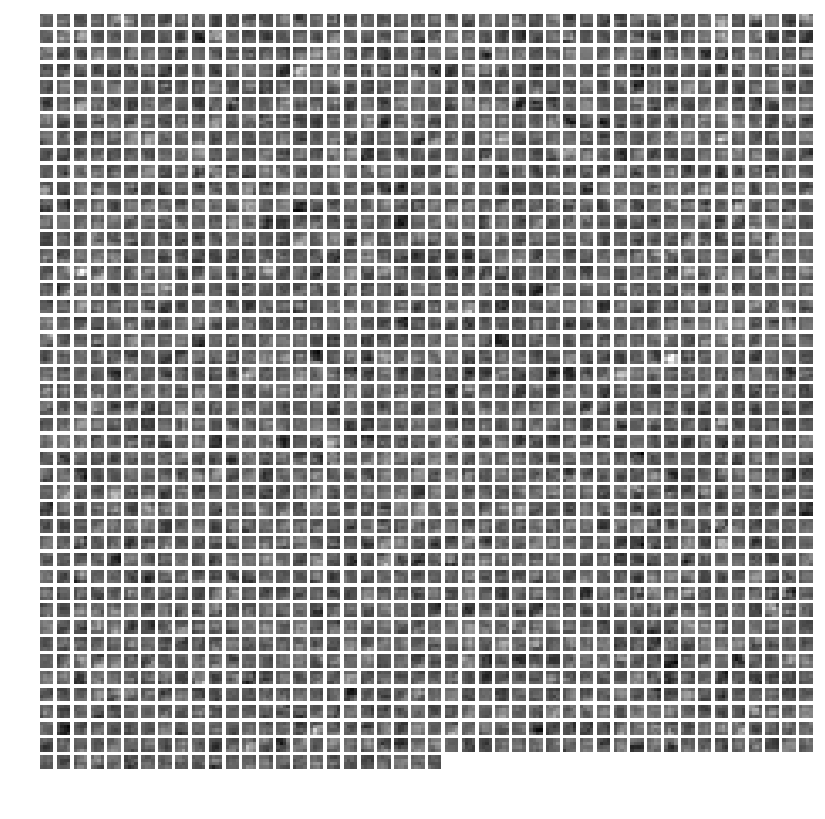

In [195]:
feat = net.blobs['res5c_branch2c'].data[0]
vis_square(feat)

array([[[[  3.62308323e-02,   1.27714546e-02,   3.60432640e-03],
         [  2.43173148e-02,   2.38858201e-02,   2.38604937e-02],
         [  2.15436593e-02,   4.04669531e-02,   2.62424201e-02],
         ..., 
         [ -4.99281101e-02,  -9.16631073e-02,  -7.49197379e-02],
         [ -4.67362665e-02,  -1.24835044e-01,  -7.12703019e-02],
         [  1.55740445e-02,  -3.12530659e-02,   1.08340913e-02]],

        [[  1.62594654e-02,  -9.69958201e-04,   5.41541027e-03],
         [  3.02906353e-02,   2.83479076e-02,   3.21436748e-02],
         [  8.08711275e-02,   1.51521355e-01,   1.18716091e-01],
         ..., 
         [ -1.67506430e-02,   1.38831874e-02,  -9.32895392e-03],
         [ -7.89632201e-02,  -1.78012401e-01,  -1.31375134e-01],
         [ -1.80659033e-02,  -1.27209470e-01,  -8.31969306e-02]],

        [[ -1.97264086e-02,  -6.83626607e-02,  -2.86637768e-02],
         [ -5.99074550e-02,  -1.47988468e-01,  -8.45339224e-02],
         [  2.35277470e-02,   6.25686720e-02,   8.146277

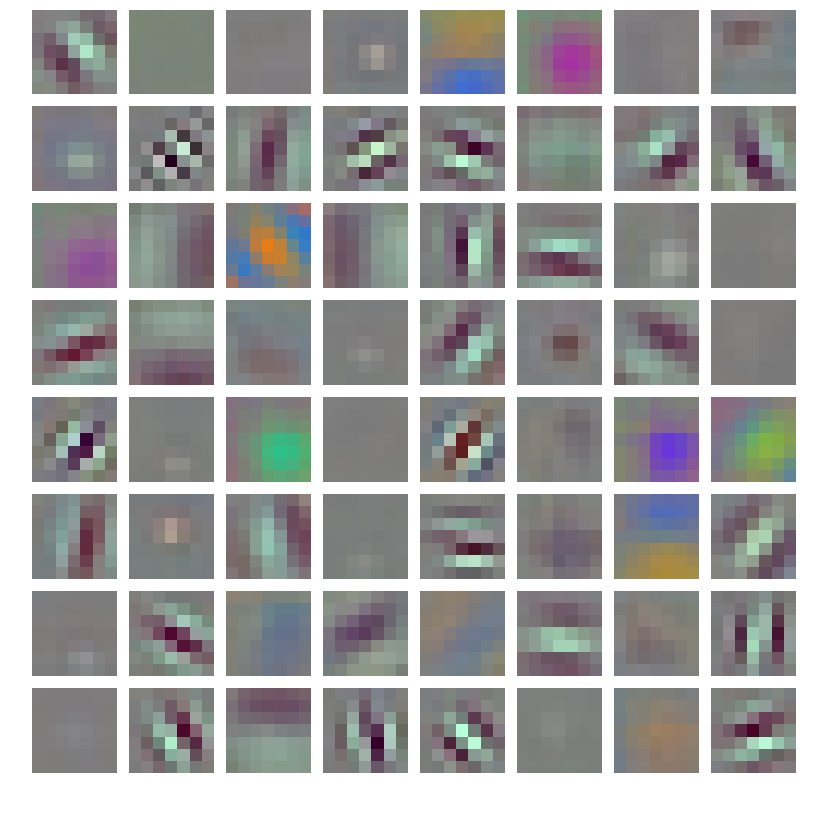

In [196]:
filters = net.params['conv1'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

filters.transpose(0, 2, 3, 1)

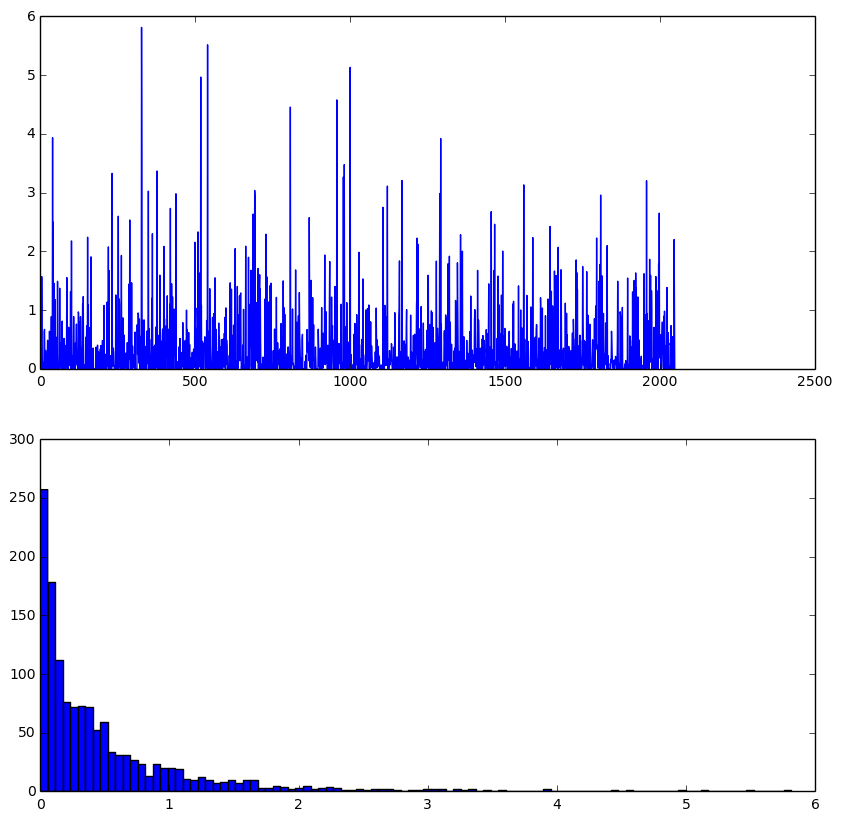

In [208]:


feat = net.blobs['pool5'].data[0]
plt.subplot(2, 1, 1)
plt.plot(feat.flat)
plt.subplot(2, 1, 2)
_ = plt.hist(feat.flat[feat.flat > 0], bins=100)

